# Brain Tumour Detection

This code is designed to train and evaluate CNN models (VGG16, EfficientNetB0, NASNetMobile) for brain tumor detection on MRI images and compare their efficacy. The process includes several steps: data preparation, image preprocessing, model training, model performance evaluation, and prediction on your own image.

During project development, the following parameters were involved:

**Software**
- OS: Windows 11
- Python 3.9.15 (Anaconda)
- IDE: PyCharm + Jupyter Notebook

**Hardware**
- CPU: i5-10300H
- RAM: 16GB
- GPU: NVIDIA GeForce GTX 1650 Ti (4 GB)

## Install the dataset from Kaggle

The dataset for training and testing the model was taken from the Kaggle platform (https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/data). And has the following characteristics:
- **Data Type**: MRI images
- **Dataset Size**: 253 files
- **File Formats**: JPG, PNG, JPEG
- **Image Sizes**: Varying
- **Categories**:
  - Tumor present (yes): 155 images
  - No tumor (no): 98 images

In [10]:
! pip install kaggle

In [11]:
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors



  0%|          | 0.00/15.1M [00:00<?, ?B/s]
  7%|6         | 1.00M/15.1M [00:00<00:07, 1.88MB/s]
 20%|#9        | 3.00M/15.1M [00:00<00:02, 5.32MB/s]
 46%|####6     | 7.00M/15.1M [00:00<00:00, 12.7MB/s]
 73%|#######2  | 11.0M/15.1M [00:00<00:00, 19.0MB/s]
 93%|#########2| 14.0M/15.1M [00:01<00:00, 20.9MB/s]
100%|##########| 15.1M/15.1M [00:01<00:00, 15.0MB/s]


In [16]:
import zipfile

with zipfile.ZipFile("brain-mri-images-for-brain-tumor-detection.zip", "r") as zip_ref:
    zip_ref.extractall(".")

## Package and library import

The following major libraries are involved in the project:
- TensorFlow / Keras
- OpenCV
- Scikit-learn
- Matplotlib
- NumPy

In [17]:
import pickle

from sklearn.metrics import accuracy_score, confusion_matrix
from keras.callbacks import EarlyStopping

from COV_brain_tumor_detection import (
    create_data_generators,
    TEST_DIR,
    TRAIN_DIR,
    VAL_DIR,
    create_model_vgg16,
    create_model_efficientnet,
    create_model_nasnetmobile,
    preprocess_images,
    load_data,
    split_data,
    clean_directory,
    save_new_images,
    plot_confusion_matrix,
    plot_data_distribution,
    plot_model_performance,
    plot_samples
)

## Preparing data

In [18]:
split_data("brain_tumor_dataset")

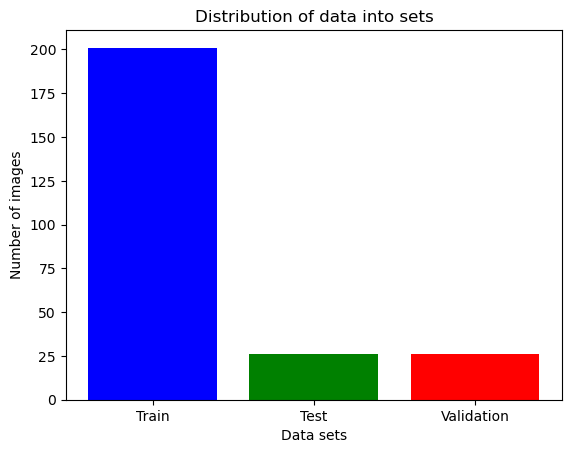

In [19]:
plot_data_distribution()

In [20]:
X_train, y_train, labels = load_data(TRAIN_DIR)
X_test, y_test, _ = load_data(TEST_DIR)
X_val, y_val, _ = load_data(VAL_DIR)

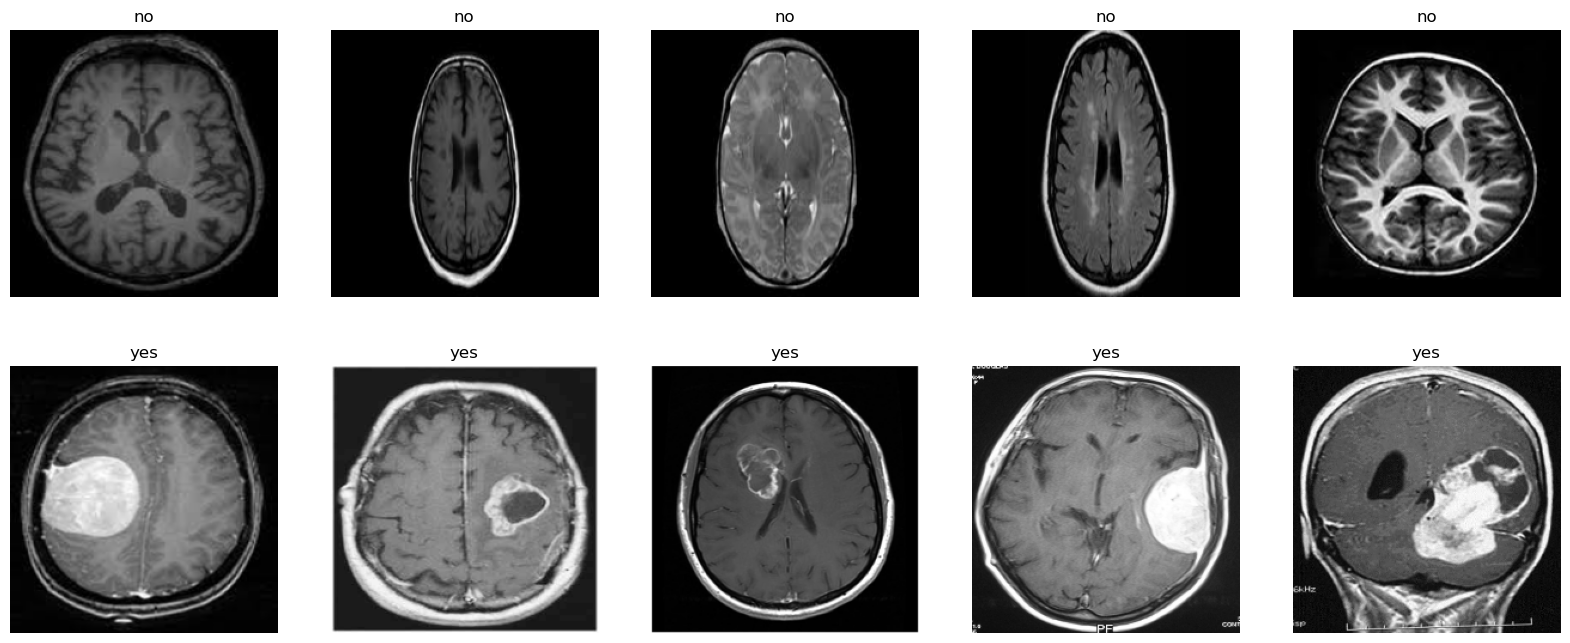

In [21]:
plot_samples(X_train, y_train, labels)

## Image preprocessing

In [22]:
X_train_prep = preprocess_images(X_train)
X_val_prep = preprocess_images(X_val)
X_test_prep = preprocess_images(X_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..27.060997].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..149.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..135.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..128.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..147.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-105.68..151.061].
Clipping input dat

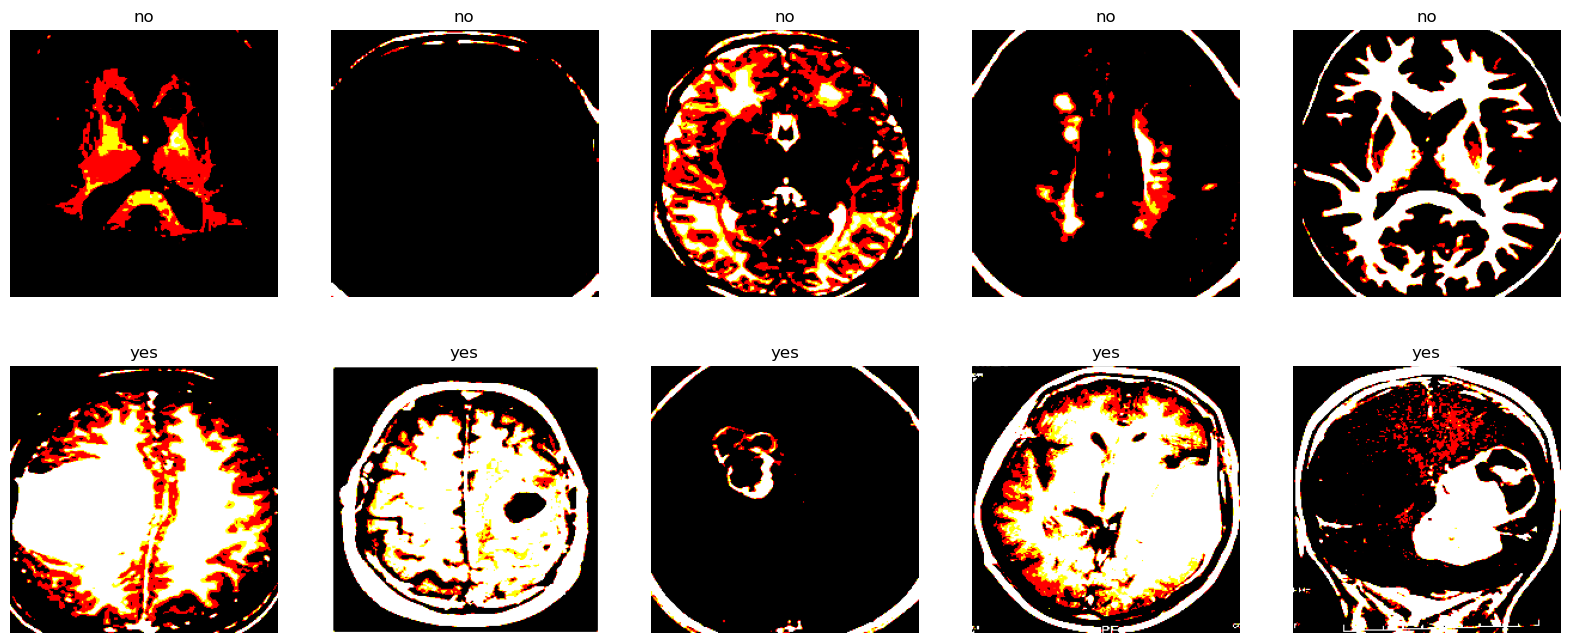

In [23]:
plot_samples(X_train_prep, y_train, labels)

## Saving and clearing data

In [24]:
save_new_images(X_train_prep, y_train, folder_name=TRAIN_DIR)
save_new_images(X_val_prep, y_val, folder_name=VAL_DIR)
save_new_images(X_test_prep, y_test, folder_name=TEST_DIR)

In [25]:
clean_directory(TRAIN_DIR)
clean_directory(VAL_DIR)
clean_directory(TEST_DIR)

In [26]:
train_generator, validation_generator = create_data_generators()

Found 201 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


## VGG16

### Model development and training

In [33]:
model_vgg16 = create_model_vgg16()

In [34]:
model_vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_2 (Dropout)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 25089     
                                                                 
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [35]:
history = model_vgg16.fit(
    train_generator,
    steps_per_epoch=7,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=2,
    callbacks=[EarlyStopping(monitor="val_accuracy", mode="max", patience=6)],
)

model_vgg16.save('COV_brain_tumor_detection/cnn-vgg16.h5')

with open("COV_brain_tumor_detection/model_vgg16_history.pkl", "wb") as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/30
7/7 [==============================] - 27s 4s/step - loss: 6.6302 - accuracy: 0.5622 - val_loss: 2.7427 - val_accuracy: 0.7308
Epoch 2/30
7/7 [==============================] - 28s 4s/step - loss: 3.0931 - accuracy: 0.6816 - val_loss: 2.6603 - val_accuracy: 0.7308
Epoch 3/30
7/7 [==============================] - 26s 4s/step - loss: 2.6264 - accuracy: 0.6915 - val_loss: 0.4152 - val_accuracy: 0.9615
Epoch 4/30
7/7 [==============================] - 27s 4s/step - loss: 1.3233 - accuracy: 0.8060 - val_loss: 0.4240 - val_accuracy: 0.8846
Epoch 5/30
7/7 [==============================] - 28s 4s/step - loss: 2.0465 - accuracy: 0.7264 - val_loss: 0.4422 - val_accuracy: 0.9231
Epoch 6/30
7/7 [==============================] - 27s 4s/step - loss: 1.6531 - accuracy: 0.7960 - val_loss: 0.6945 - val_accuracy: 0.8846
Epoch 7/30
7/7 [==============================] - 28s 4s/step - loss: 1.1612 - accuracy: 0.8209 - val_loss: 0.9856 - val_accuracy: 0.8077
Epoch 8/30
7/7 [==================

### Model evaluation

To evaluate the quality and effectiveness of the model, I used the following measures:
- Accuracy
- Loss
- Confusion Matrix

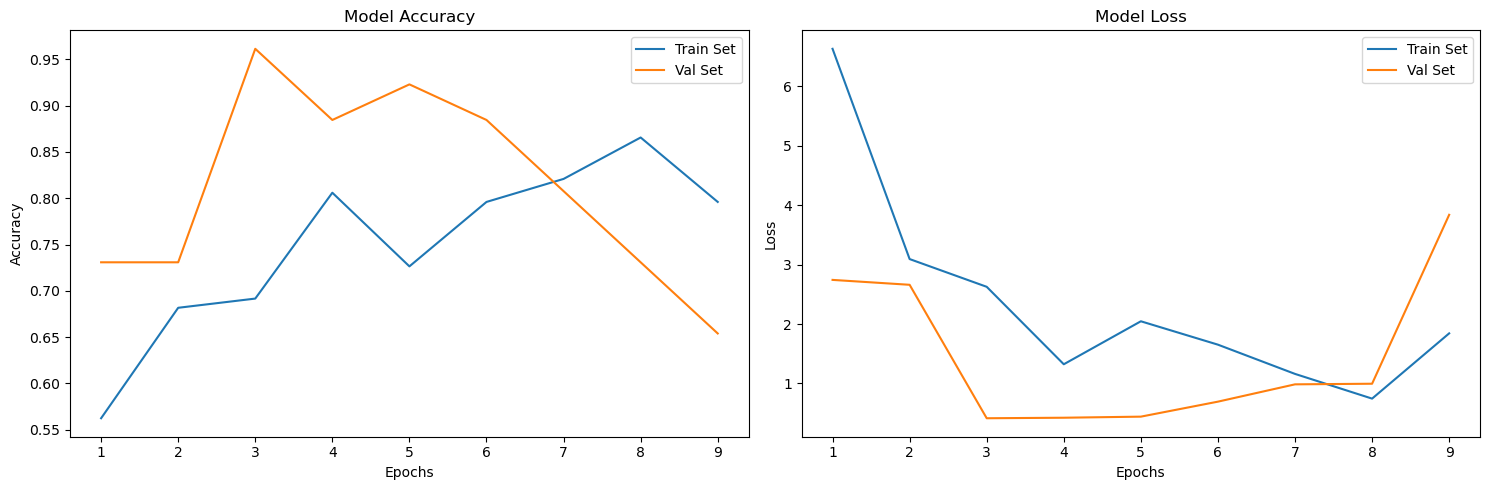

In [36]:
with open("COV_brain_tumor_detection/histories/model_vgg16_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [37]:
predictions_test = [1 if x > 0.5 else 0 for x in model_vgg16.predict(X_test_prep)]

1/1 [==============================] - 3s 3s/step


In [38]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.81


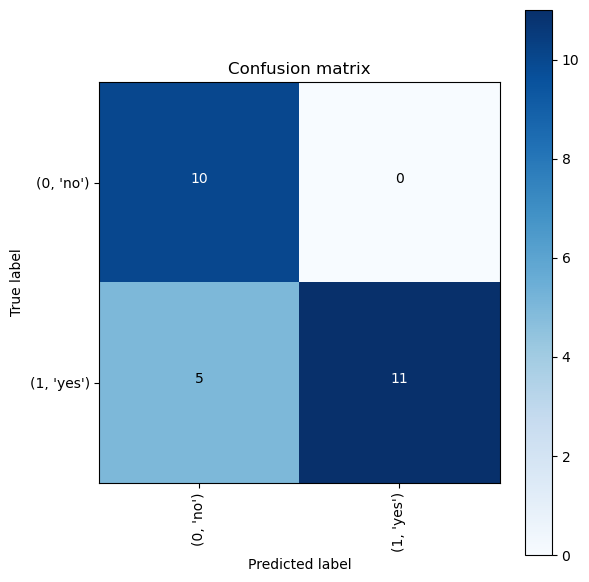

In [39]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

In the process of evaluating the efficiency and quality of the model, the following results were achieved:
- Accuracy: **~81%** (Target: >80%)
- Confusion Matrix: 
   - TP: **11**, TN: **10**, FP: **5**, FN: **0** (Target: achieve high overall classification accuracy)

## EfficientNet

### Model development and training

In [40]:
model_efficientnet = create_model_efficientnet()

In [41]:
model_efficientnet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 1,281
Non-trainable params: 4,049,571
_________________________________________________________________


In [42]:
history = model_efficientnet.fit(
    train_generator,
    steps_per_epoch=7,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=2,
    callbacks=[EarlyStopping(monitor="val_accuracy", mode="max", patience=6)],
)

with open("COV_brain_tumor_detection/model_efficientnet_history.pkl", "wb") as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/30
7/7 [==============================] - 15s 1s/step - loss: 0.7344 - accuracy: 0.6219 - val_loss: 0.5909 - val_accuracy: 0.7308
Epoch 2/30
7/7 [==============================] - 7s 929ms/step - loss: 0.7406 - accuracy: 0.5124 - val_loss: 0.6136 - val_accuracy: 0.6923
Epoch 3/30
7/7 [==============================] - 6s 792ms/step - loss: 0.7869 - accuracy: 0.5274 - val_loss: 0.6272 - val_accuracy: 0.6923
Epoch 4/30
7/7 [==============================] - 6s 775ms/step - loss: 0.6750 - accuracy: 0.6269 - val_loss: 0.6315 - val_accuracy: 0.6923
Epoch 5/30
7/7 [==============================] - 6s 892ms/step - loss: 0.6640 - accuracy: 0.5821 - val_loss: 0.6469 - val_accuracy: 0.6923
Epoch 6/30
7/7 [==============================] - 6s 815ms/step - loss: 0.6860 - accuracy: 0.6368 - val_loss: 0.6091 - val_accuracy: 0.6923
Epoch 7/30
7/7 [==============================] - 6s 782ms/step - loss: 0.6992 - accuracy: 0.6219 - val_loss: 0.5950 - val_accuracy: 0.7308


### Model evaluation

To evaluate the quality and effectiveness of the model, I used the following measures:
- Accuracy
- Loss
- Confusion Matrix

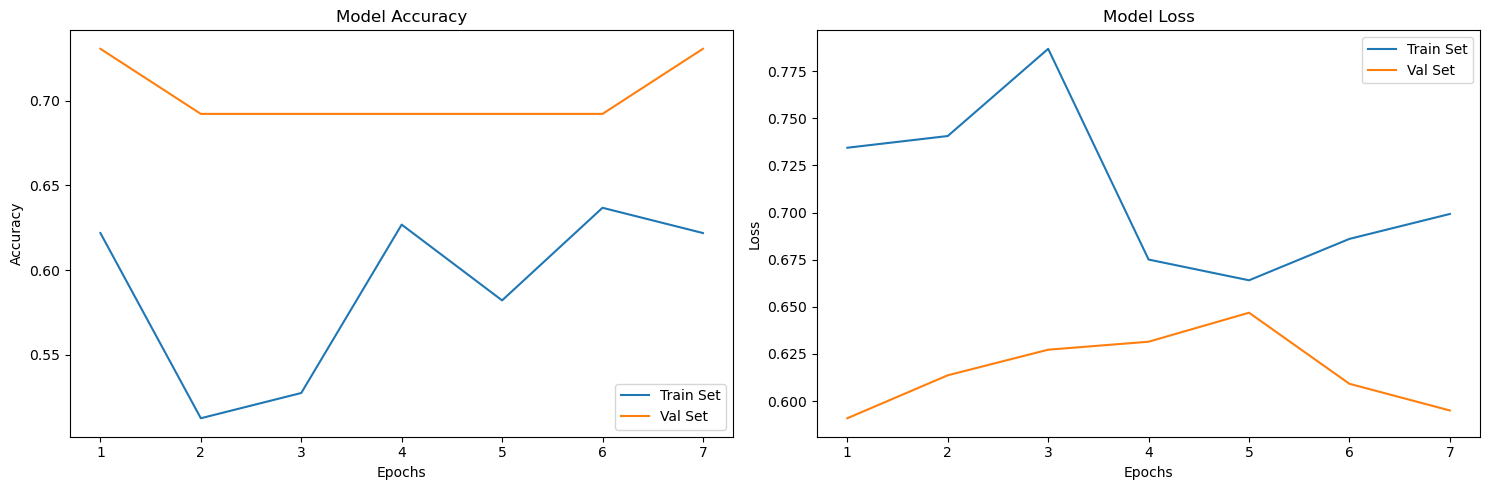

In [43]:
with open("COV_brain_tumor_detection/histories/model_efficientnet_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [44]:
predictions_test = [1 if x > 0.5 else 0 for x in model_efficientnet.predict(X_test_prep)]

1/1 [==============================] - 2s 2s/step


In [45]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.42


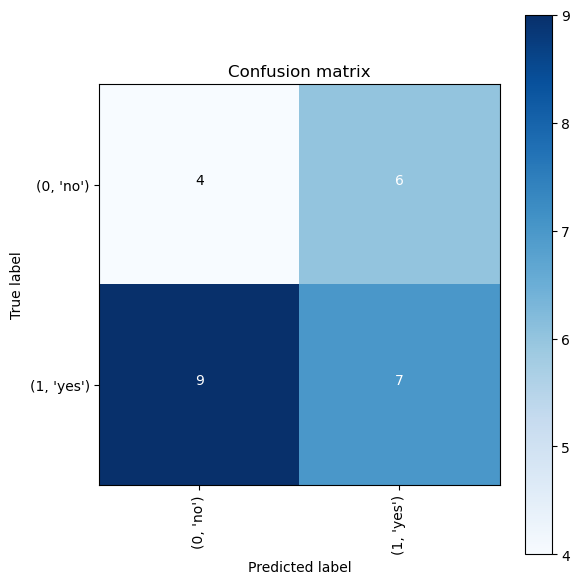

In [46]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

In the process of evaluating the efficiency and quality of the model, the following results were achieved:
- Accuracy: **~42%** (Target: >80%)
- Confusion Matrix: 
   - TP: **7**, TN: **4**, FP: **9**, FN: **6** (Target: achieve high overall classification accuracy)

## ConvNeXt

### Model development and training

In [47]:
model_nasnetmobile = create_model_nasnetmobile()

In [48]:
model_nasnetmobile.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_1   (None, 1056)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1056)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 1057      
                                                                 
Total params: 4,270,773
Trainable params: 1,057
Non-trainable params: 4,269,716
_________________________________________________________________


In [49]:
history = model_nasnetmobile.fit(
    train_generator,
    steps_per_epoch=7,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=2,
    callbacks=[EarlyStopping(monitor="val_accuracy", mode="max", patience=6)],
)

with open("COV_brain_tumor_detection/model_nasnetmobile_history.pkl", "wb") as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/30
7/7 [==============================] - 27s 2s/step - loss: 6.3614 - accuracy: 0.5473 - val_loss: 2.5449 - val_accuracy: 0.6154
Epoch 2/30
7/7 [==============================] - 6s 811ms/step - loss: 4.8090 - accuracy: 0.5473 - val_loss: 1.2206 - val_accuracy: 0.6154
Epoch 3/30
7/7 [==============================] - 6s 892ms/step - loss: 4.0447 - accuracy: 0.5274 - val_loss: 1.2977 - val_accuracy: 0.5769
Epoch 4/30
7/7 [==============================] - 6s 836ms/step - loss: 3.7610 - accuracy: 0.4776 - val_loss: 1.0776 - val_accuracy: 0.5769
Epoch 5/30
7/7 [==============================] - 6s 814ms/step - loss: 3.6840 - accuracy: 0.5224 - val_loss: 1.4378 - val_accuracy: 0.5769
Epoch 6/30
7/7 [==============================] - 7s 945ms/step - loss: 2.8346 - accuracy: 0.5821 - val_loss: 1.4144 - val_accuracy: 0.5769
Epoch 7/30
7/7 [==============================] - 6s 783ms/step - loss: 3.0433 - accuracy: 0.5224 - val_loss: 0.7967 - val_accuracy: 0.5769


### Model evaluation

To evaluate the quality and effectiveness of the model, I used the following measures:
- Accuracy
- Loss
- Confusion Matrix

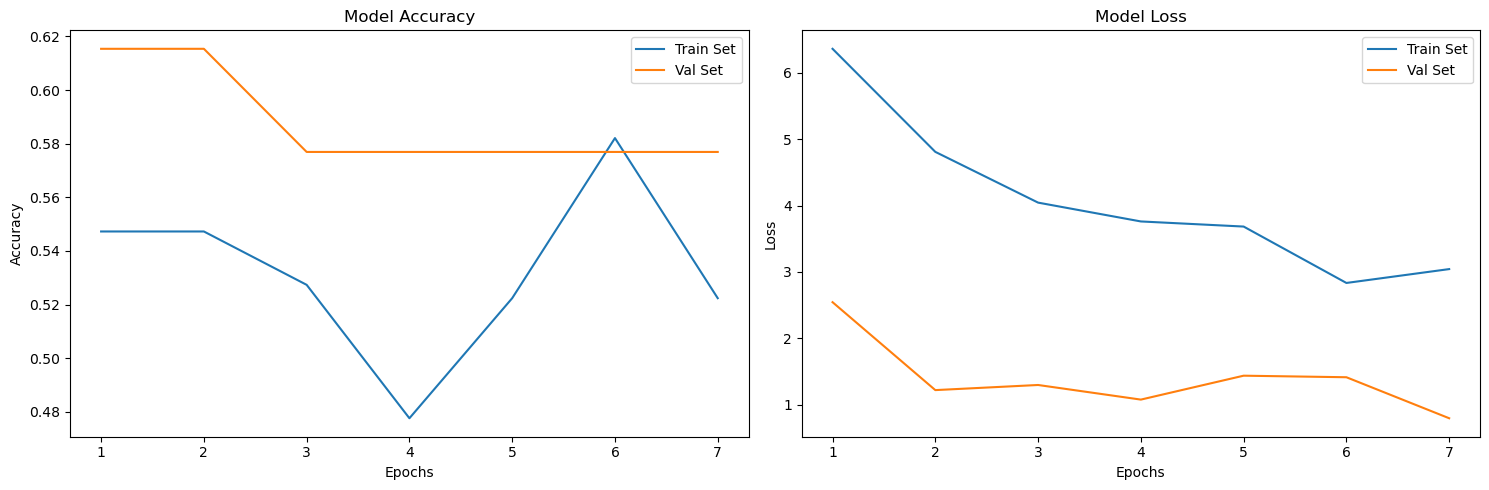

In [50]:
with open("COV_brain_tumor_detection/histories/model_nasnetmobile_history.pkl", "rb") as file_pi:
    loaded_history = pickle.load(file_pi)
    
plot_model_performance(loaded_history)

In [52]:
predictions_test = [1 if x > 0.5 else 0 for x in model_nasnetmobile.predict(X_test_prep)]

1/1 [==============================] - 1s 814ms/step


In [53]:
accuracy = accuracy_score(y_test, predictions_test)
print("Test Accuracy = %.2f" % accuracy)

Test Accuracy = 0.50


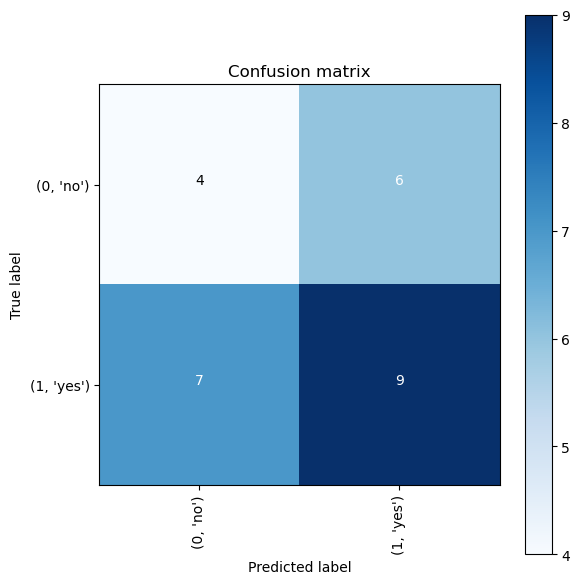

In [54]:
confusion_mtx = confusion_matrix(y_test, predictions_test)
plot_confusion_matrix(confusion_mtx, classes=list(labels.items()), normalize=False)

In the process of evaluating the efficiency and quality of the model, the following results were achieved:
- Accuracy: **~50%** (Target: >80%)
- Confusion Matrix: 
   - TP: **9**, TN: **4**, FP: **7**, FN: **6** (Target: achieve high overall classification accuracy)

## Example of testing the VGG16 model on personal image

In [1]:
import numpy as np

from PIL import Image
from keras.saving.save import load_model

In [2]:
model = load_model('COV_brain_tumor_detection/cnn-vgg16.h5')

In [3]:
def predict_tumor(img_path):
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_tensor = np.expand_dims(img_array, axis=0)
    img_tensor = img_tensor.astype('float32') / 255.0

    prediction = model.predict(img_tensor)
    
    if prediction[0][0] > 0.5:
        return "The tumour was found"
    else:
        return "No tumour was found"

In [4]:
image_path = 'yes_tumor_example.jpg'

In [5]:
result = predict_tumor(image_path)
print(result)

1/1 [==============================] - 1s 681ms/step
The tumour was found
